In [13]:
#项目11-项目实施代码
#第一步：数据导入
import pandas as pd
names=['variance','skewness','kurtosis','entropy','class']
dataset=pd.read_csv('data_banknote_authentication.txt',delimiter=',',names=names)
print('钞票鉴别数据集')
print(dataset)

钞票鉴别数据集
      variance  skewness  kurtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]


In [14]:
#第二步：数据分析（查看数据分组）
print(dataset.groupby('class').size())

class
0    762
1    610
dtype: int64


In [15]:
#第二步：数据分析（数据统计）
print(dataset.describe())

          variance     skewness     kurtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


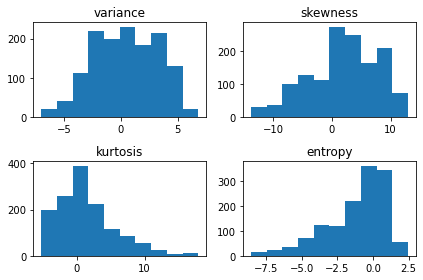

In [16]:
#第三步：数据可视化（单变量图--直方图）
import matplotlib.pyplot as plt

#分别提取数据集中的特征变量和标签值
data=dataset.iloc[range(0,1372),range(0,4)].values  #提取训练数据
target=dataset.iloc[range(0,1372),range(4,5)].values.reshape(1,1372)[0]#提取标签值
names=['variance','skewness','kurtosis','entropy']

#绘制直方图
plt.figure() #创建绘图对象
for i,name in enumerate(names):
    plt.subplot(2,2,i+1)
    plt.hist(data[:,i])  #绘制直方图
    plt.title(name)
plt.tight_layout() #调整图形布局
plt.show()

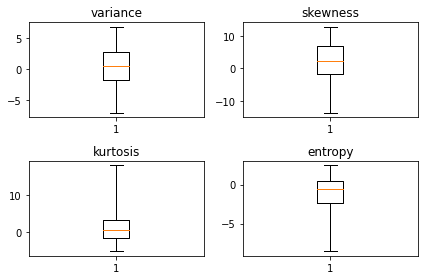

In [17]:
#第三步：数据可视化（单变量图--箱线图）
plt.figure() #创建绘图对象
for i,name in enumerate(names):
    plt.subplot(2,2,i+1)
    plt.boxplot(data[:,i],whis=4)#绘制箱形图
    plt.title(name)
plt.tight_layout() #调整图形布局
plt.show()

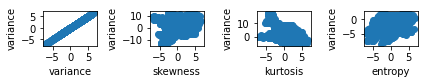

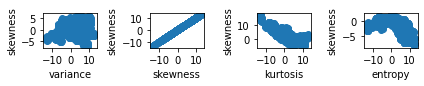

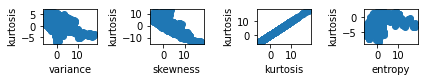

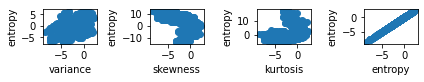

In [18]:
#第三步：数据可视化（多变量图--散点图）
plt.figure() #创建绘图对象
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,j+1)
        plt.scatter(data[:,i],data[:,j]) #绘制散点图
        plt.xlabel(names[j])
        plt.ylabel(names[i])
    plt.tight_layout() #调整图形布局
    plt.show()

In [19]:
#第四步：算法评估
#导入算法模块
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  #导入逻辑回归算法模块
from sklearn.neighbors import KNeighborsClassifier   #导入k近邻分类算法模块
from sklearn.naive_bayes import GaussianNB           #导入高斯朴素贝叶斯算法模块
from sklearn.tree import DecisionTreeClassifier      #导入决策树分类算法模块
from sklearn.svm import SVC                          #导入支持向量机分类模块
from sklearn.ensemble import RandomForestClassifier  #导入随机森林分类算法模块
from sklearn.neural_network import MLPClassifier     #导入神经网络算法模块
#拆分数据集
x,y=data,target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#搭建模型
models=[]
LRmodel=LogisticRegression(solver='liblinear')                 #搭建逻辑回归模型
kNNmodel=KNeighborsClassifier()                                #搭建k近邻模型
GNBmodel=GaussianNB()                                          #搭建高斯朴素贝叶斯模型
DTreemodel=DecisionTreeClassifier(random_state=1)              #搭建决策树分类模型
SVMmodel=SVC(gamma='auto',random_state=1)                      #搭建支持向量机分类模型
RFmodel=RandomForestClassifier(n_estimators=10,random_state=1) #搭建随机森林分类模型
MLPmodel=MLPClassifier(hidden_layer_sizes=(5,5),random_state=1,max_iter=500) #搭建神经网络模型
#将各个模型加入models中
models.append(('LRmodel',LRmodel))
models.append(('kNNmodel',kNNmodel))
models.append(('GNBmodel',GNBmodel))
models.append(('DTreemodel',DTreemodel))
models.append(('SVMmodel',SVMmodel))
models.append(('RFmodel',RFmodel))
models.append(('MLPmodel',MLPmodel))

In [20]:
#第四步：算法评估
#使用交叉验证法约束模型的训练过程，并估计每个模型的预测准确率
from sklearn.model_selection import cross_val_score  #导入交叉验证模块
from sklearn.model_selection import KFold

for name,model in models:
    kfold=KFold(n_splits=10,random_state=100,shuffle=True)#10折交叉验证
    cv_scores=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    print('%s的预测准确率为：%f'%(name,cv_scores.mean()))

LRmodel的预测准确率为：0.990876
kNNmodel的预测准确率为：0.999091
GNBmodel的预测准确率为：0.840409
DTreemodel的预测准确率为：0.982702
SVMmodel的预测准确率为：1.000000
RFmodel的预测准确率为：0.989066
MLPmodel的预测准确率为：1.000000


In [21]:
#第五步：训练与评估模型（支持向量机模型）
from sklearn.metrics import classification_report
SVMmodel=SVC(gamma='auto',random_state=1) 
SVMmodel.fit(x_train,y_train)
#对模型进行评估，并输出评估报告
pred=SVMmodel.predict(x_test)
re=classification_report(y_test,pred)
print('支持向量机模型评估报告：')
print(re)

支持向量机模型评估报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       112

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [22]:
#第五步：训练与评估模型（神经网络模型）
MLPmodel=MLPClassifier(hidden_layer_sizes=(5,5),random_state=1,max_iter=500) 
MLPmodel.fit(x_train,y_train)
#对模型进行评估，并输出评估报告
pred=MLPmodel.predict(x_test)
re=classification_report(y_test,pred)
print('神经网络模型评估报告：')
print(re)

神经网络模型评估报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       112

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [23]:
#第六步：新数据预测（支持向量机模型）
x_new=[[3.8216,5.6661,-2.7074,-0.46611]]
#支持向量机模型预测新数据
SVMscore=SVMmodel.predict(x_new)
if SVMscore==0:
    print("支持向量机模型预测结果：该钞票是假钞")
else:
    print("支持向量机模型预测结果：该钞票是真钞")
    
#神经网络模型预测新数据
MLPscore=MLPmodel.predict(x_new)
if MLPscore==0:
    print("神经网络模型预测结果：该钞票是假钞")
else:
    print("神经网络模型预测结果：该钞票是真钞")

支持向量机模型预测结果：该钞票是假钞
神经网络模型预测结果：该钞票是假钞
